In [1]:
#Import all the tools we need

#Regular EDA(Exploratory Data Analysis) and plotting librabries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



In [2]:
df =pd.read_csv("sentiment_tweets3.csv", index_col=0)
df


,message to examine,label (depression result)
Index,,
106,just had a real good moment. i missssssssss hi...,0
217,is reading manga http://plurk.com/p/mzp1e,0
220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
288,@lapcat Need to send 'em to my accountant tomo...,0
540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
802309,No Depression by G Herbo is my mood from now o...,1
802310,What do you do when depression succumbs the br...,1
802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


There are more than 10000 samples of data

In [3]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         message to examine  label (depression result)
Index                                                
106                  False                      False
217                  False                      False
220                  False                      False
288                  False                      False
540                  False                      False
...                    ...                        ...
802309               False                      False
802310               False                      False
802311               False                      False
802312               False                      False
802313               False                      False

[10314 rows x 2 columns]>

In [4]:
df.describe()

,label (depression result)
count,10314.000000
mean,0.224355
std,0.417177
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.head()

,message to examine,label (depression result)
Index,,
106,just had a real good moment. i missssssssss hi...,0
217,is reading manga http://plurk.com/p/mzp1e,0
220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
288,@lapcat Need to send 'em to my accountant tomo...,0
540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df_comments = df[['message to examine', 'label (depression result)']]
df_comments

,message to examine,label (depression result)
Index,,
106,just had a real good moment. i missssssssss hi...,0
217,is reading manga http://plurk.com/p/mzp1e,0
220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
288,@lapcat Need to send 'em to my accountant tomo...,0
540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
802309,No Depression by G Herbo is my mood from now o...,1
802310,What do you do when depression succumbs the br...,1
802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [7]:
df_comments.head()

,message to examine,label (depression result)
Index,,
106,just had a real good moment. i missssssssss hi...,0
217,is reading manga http://plurk.com/p/mzp1e,0
220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
288,@lapcat Need to send 'em to my accountant tomo...,0
540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [8]:
df_comments.groupby('label (depression result)').describe()

message to examine         \
                                       count unique   
label (depression result)                             
0                                       8000   7996   
1                                       2314   2287   

                                                                              \
                                                                         top   
label (depression result)                                                      
0                                                              Good morning    
1                          Mom's depression tied to kids' emotional, inte...   

                                
                          freq  
label (depression result)       
0                            3  
1                           11

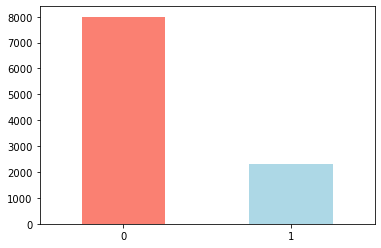

In [9]:
df_comments['label (depression result)'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0);

In [10]:
# Split data into dependent and independent varaibles (X and y)

X = df_comments.drop("label (depression result)", axis=1)
y = df_comments["label (depression result)"]

# Import library to be used for over-sampling
from sklearn.utils import resample

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Combine them back for resampling
dep_train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
majority = dep_train_data[dep_train_data["label (depression result)"] == 0]
minority = dep_train_data[dep_train_data["label (depression result)"] == 1]


# upsample minority
min_upsampled = resample(minority,
                        replace=True, # sample with replacement
                        n_samples=len(majority), # match number in majority class
                        random_state=0) 

# combine majority and upsampled minority
upsampled = pd.concat([majority, min_upsampled])


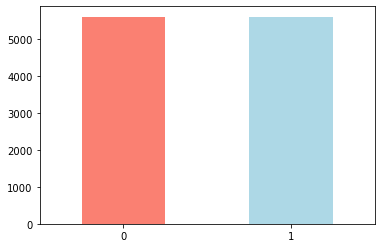

In [11]:
upsampled['label (depression result)'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0);

In [12]:
import string
from nltk.corpus import stopwords

# Define a function that removes punctuations and stopwords
def text_process(tex):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuations.
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    # Check characters to see if they are in punctuation
    no_punc = [char for char in tex if char not in string.punctuation]
    
    # Join the characters again to form the string.
    no_punc = ''.join(no_punc)
    
    # Remove stopwords and return cleaned text
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [13]:
df_comments['message to examine'].head().apply(text_process)

Index
106             [real, good, moment, missssssssss, much]
217                 [reading, manga, httpplurkcompmzp1e]
220    [comeagainjen, httptwitpiccom2y2lx, httpwwwyou...
288    [lapcat, Need, send, em, accountant, tomorrow,...
540                [ADD, MYSPACE, myspacecomLookThunder]
Name: message to examine, dtype: object

In [14]:
# Import libraries for bag-of-words and vectorization
from sklearn.feature_extraction.text import CountVectorizer
# creating bag-of-words with the below
bow_trans = CountVectorizer(analyzer=text_process)

In [32]:
#Import TFIDF transformer
from sklearn.feature_extraction.text import TfidfTransformer

### Shuffle data

In [157]:
# Import numpy
import numpy as np

# import library for shuffling
from sklearn.utils import shuffle

np.random.seed(0)
df_comments = shuffle(df_comments)

### Splitting data into traning and test sets

In [158]:
len(df_comments)

10314

In [159]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(df_comments['message to examine'][:1000], df_comments['label (depression result)'][:1000], test_size=0.3)

In [160]:
df_comments['label (depression result)'][:1000].value_counts()

0    788
1    212
Name: label (depression result), dtype: int64

## Modelling 

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

Log_pipeline = Pipeline([('Log_bow', CountVectorizer(analyzer=text_process)),
                        ('Log_tfidf', TfidfTransformer()),
                        ('Log_classifier', LogisticRegression())
                       ])

In [162]:
Log_pipeline.fit(text_train, label_train)

Pipeline(steps=[('Log_bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002BD4DE44CA0>)),
                ('Log_tfidf', TfidfTransformer()),
                ('Log_classifier', LogisticRegression())])

In [164]:
Log_pipeline.score(text_test, label_test)

0.8966666666666666

### Evaluation

In [169]:
from sklearn.metrics import classification_report

y_preds = Log_pipeline.predict(text_test)

# Classification report
print(classification_report(label_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       240
           1       1.00      0.48      0.65        60

    accuracy                           0.90       300
   macro avg       0.94      0.74      0.80       300
weighted avg       0.91      0.90      0.88       300

